# Data mining with python

### Contents
1. Import Necessary Libraries
2. Read In and Explore the Data
3. Data Analysis
4. Data Visualization
5. Cleaning Data
6. Using ML Models

### Data dict
VariableDefinitionKey 
* **survival** Survival 0 = No, 1 = Yes 
* **pclass** Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 
* **sex** Sex 
* **age** Age in years 
* **sibsp** # of siblings / spouses aboard the Titanic parch # of parents / * children aboard the Titanic 
* **ticket** Ticket number 
* **fare** Passenger fare 
* **cabin** Cabin number 
* **embarked** Port * of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

**Variable Notes**

**pclass**: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.

## 1. import necessary library

In [1]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import graphviz
from sklearn import tree, metrics


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

## 2. Read In and Explore the Data

In [2]:
# get titanic & test csv files as a DataFrame
df = pd.read_csv("./titanic_data_set/train.csv")

# preview the data
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"McGough, Mr. James Robert",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 3. Data Analysis

In [4]:
print(df.columns, '\n', df.shape)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 
 (891, 12)


In [5]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S
430,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.5500,C52,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* **Numerical Features:** Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
* **Categorical Features:** Survived, Sex, Embarked, Pclass
* **Alphanumeric Features:** Ticket, Cabin

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Some Predictions:
* Sex: Females are more likely to survive.
* SibSp/Parch: People traveling alone are more likely to survive.
* Age: Young children are more likely to survive.
* Pclass: People of higher socioeconomic class are more likely to survive.

## 4. Data Visualization

### Pclass Feature

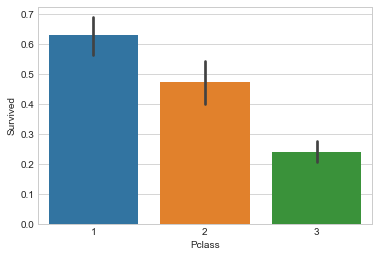

In [8]:
sns.barplot(df['Pclass'], df['Survived'], data=df)

### Sex Feature

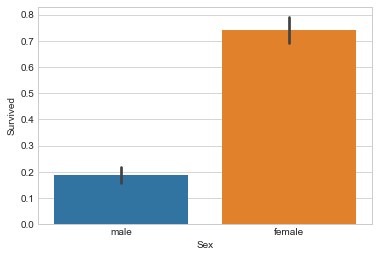

In [9]:
sns.barplot(df['Sex'], df['Survived'], data=df)

### Age Feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
Age    714 non-null float64
dtypes: float64(1)
memory usage: 7.0 KB
None


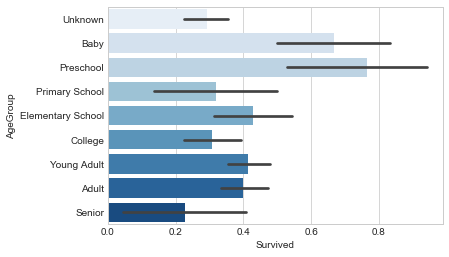

0                College
1                  Adult
2            Young Adult
3            Young Adult
4            Young Adult
5                Unknown
6                  Adult
7                   Baby
8            Young Adult
9      Elementary School
10             Preschool
11                 Adult
12               College
13                 Adult
14     Elementary School
15                 Adult
16                  Baby
17               Unknown
18           Young Adult
19               Unknown
20           Young Adult
21           Young Adult
22     Elementary School
23           Young Adult
24        Primary School
25                 Adult
26               Unknown
27               College
28               Unknown
29               Unknown
             ...        
861              College
862                Adult
863              Unknown
864          Young Adult
865                Adult
866          Young Adult
867          Young Adult
868              Unknown
869            Preschool


In [10]:
print(df[['Age']].info())
df['Age'] = df['Age'].astype(float).fillna(-0.5)
bins = [-1, 0, 3, 6, 12, 18, 23, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Preschool', 'Primary School', 'Elementary School', 'College', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# sns.barplot(df['AgeGroup'], df['Survived'], data=df)
#draw a bar plot of Age vs. survival
sns.barplot(df['Survived'], df['AgeGroup'], data=df, palette='Blues')
plt.show()

print(df.AgeGroup)

### SibSp Feature

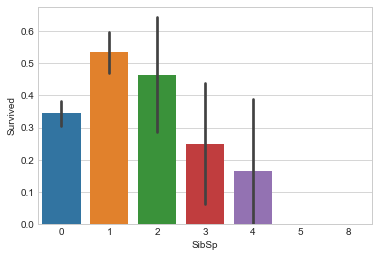

In [11]:
sns.barplot(df['SibSp'], df['Survived'], data=df)

### Parch Feature

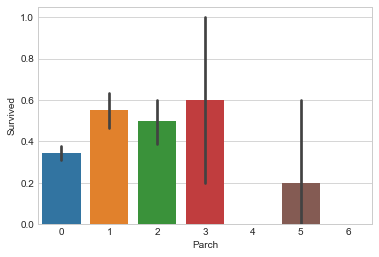

In [12]:
sns.barplot(df['Parch'], df['Survived'], data=df)

### Fare Feature

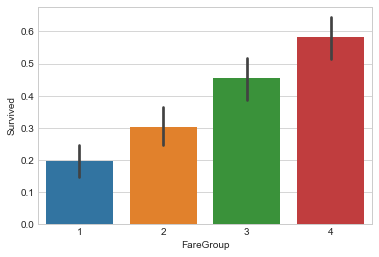

In [13]:
labels = [1, 2, 3, 4]
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=labels)

sns.barplot(df['FareGroup'], df['Survived'], data=df)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeGroup       891 non-null category
FareGroup      891 non-null category
dtypes: category(2), float64(2), int64(5), object(5)
memory usage: 85.9+ KB


### Cabin Feature

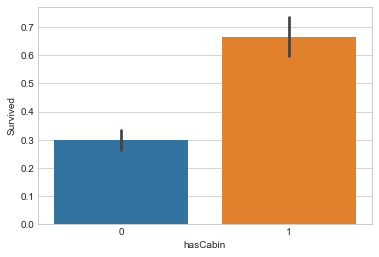

In [15]:
df['hasCabin'] = df['Cabin'].notnull().astype(int)

sns.barplot(df['hasCabin'], df['Survived'], data=df)

### Embark Feature

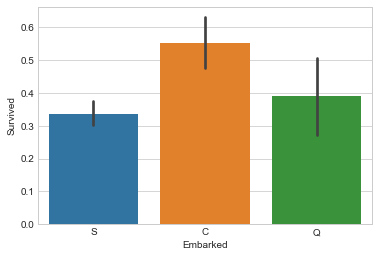

In [16]:
sns.barplot(df['Embarked'], df['Survived'], data=df)

## 5. Cleaning Data

### Find null values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeGroup       891 non-null category
FareGroup      891 non-null category
hasCabin       891 non-null int32
dtypes: category(2), float64(2), int32(1), int64(5), object(5)
memory usage: 89.4+ KB


### Pclass Feature

### Age Feature

In [18]:
df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [19]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


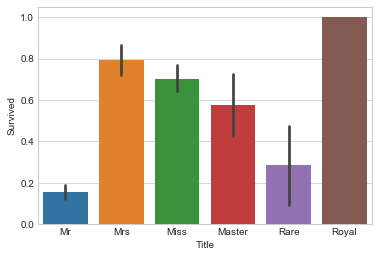

In [20]:
#replace various titles with more common names

df['Title'] = df['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
df['Title'] = df['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

sns.barplot(df['Title'], df['Survived'])

In [21]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}

df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup,hasCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,College,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,4,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,2,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,4,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,2,0,1
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,330877,8.4583,NaN,Q,Unknown,2,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult,4,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Baby,3,0,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Young Adult,2,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Elementary School,3,0,3


In [22]:
# print(df[['Age']].info())
# df['Age'] = df['Age'].astype(float)
# bins = [-1, 0, 3, 6, 12, 18, 23, 35, 60, np.inf]
# labels = ['Unknown', 'Baby', 'Preschool', 'Primary School', 'Elementary School', 'College', 'Young Adult', 'Adult', 'Senior']

# fill missing age with mode age group for each title
age_value = {}
for n in range(6):
    age_value[n+1] = df[df['Title'] == n+1]['AgeGroup'].mode()
    print(age_value[n+1].values)

[Young Adult]
Categories (9, object): [Unknown < Baby < Preschool < Primary School ... College < Young Adult < Adult < Senior]
[Young Adult]
Categories (9, object): [Unknown < Baby < Preschool < Primary School ... College < Young Adult < Adult < Senior]
[Adult]
Categories (9, object): [Unknown < Baby < Preschool < Primary School ... College < Young Adult < Adult < Senior]
[Baby]
Categories (9, object): [Unknown < Baby < Preschool < Primary School ... College < Young Adult < Adult < Senior]
[Young Adult, Adult]
Categories (9, object): [Unknown < Baby < Preschool < Primary School ... College < Young Adult < Adult < Senior]
[Adult]
Categories (9, object): [Unknown < Baby < Preschool < Primary School ... College < Young Adult < Adult < Senior]


In [23]:
df.AgeGroup.head(15)

0               College
1                 Adult
2           Young Adult
3           Young Adult
4           Young Adult
5               Unknown
6                 Adult
7                  Baby
8           Young Adult
9     Elementary School
10            Preschool
11                Adult
12              College
13                Adult
14    Elementary School
Name: AgeGroup, dtype: category
Categories (9, object): [Unknown < Baby < Preschool < Primary School ... College < Young Adult < Adult < Senior]

In [24]:
age_title_mapping = {1: "Young Adult", 2: "Young Adult", 3: "Adult", 4: "Baby", 5: "Young Adult", 6: "Adult"}
# age_title_mapping = {1: "Young Adult", 2: "Young Adult", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

df.AgeGroup = df.AgeGroup.replace("Unknown", df["Title"].map(age_title_mapping))

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeGroup       891 non-null category
FareGroup      891 non-null category
hasCabin       891 non-null int32
Title          891 non-null int64
dtypes: category(2), float64(2), int32(1), int64(6), object(5)
memory usage: 96.4+ KB


In [26]:
age_mapping = {'Baby': 1, 'Preschool': 2, 'Primary School': 3, 'Elementary School': 4, 'College': 5, 'Young Adult': 6, 'Adult': 7, 'Senior': 8}
df.AgeGroup = df.AgeGroup.map(age_mapping)

### Sex Feature

In [27]:
df.Sex = (df.Sex.values == 'male').astype(int)
df['Sex'].head()
# Male = 1, Female = 0

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

### SibSp Feature

ok

### Parch Feature

ok

### Fare Feature

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeGroup       891 non-null int64
FareGroup      891 non-null category
hasCabin       891 non-null int32
Title          891 non-null int64
dtypes: category(1), float64(2), int32(2), int64(7), object(4)
memory usage: 98.6+ KB


In [29]:
#map Fare values into groups of numerical values
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels = [1, 2, 3, 4]).astype(int)
df[['Fare', 'FareGroup']].sample(10)

,Fare,FareGroup
305,151.5500,4
52,76.7292,4
746,20.2500,3
732,0.0000,1
653,7.8292,1
174,30.6958,3
502,7.6292,1
360,27.9000,3
520,93.5000,4
707,26.2875,3


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeGroup       891 non-null int64
FareGroup      891 non-null int32
hasCabin       891 non-null int32
Title          891 non-null int64
dtypes: float64(2), int32(3), int64(7), object(4)
memory usage: 101.0+ KB


### Cabin Feature

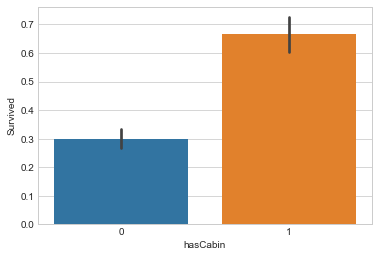

In [31]:
sns.barplot(df['hasCabin'], df['Survived'], data=df)

### Embark Feature

In [32]:
# map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df['Embarked'] = df['Embarked'].map(embarked_mapping)

df['Embarked'] = df['Embarked'].fillna(2).astype(int)
df.sample(5)

# Southampton : 1
# Cherbourg : 2
# Queenstown : 3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup,hasCabin,Title
240,241,0,3,"Zabour, Miss. Thamine",0,-0.50,1,0,2665,14.4542,NaN,2,6,2,0,2
438,439,0,1,"Fortune, Mr. Mark",1,64.00,1,4,19950,263.0000,C23 C25 C27,1,8,4,1,1
831,832,1,2,"Richards, Master. George Sibley",1,0.83,1,1,29106,18.7500,NaN,1,1,3,0,4
501,502,0,3,"Canavan, Miss. Mary",0,21.00,0,0,364846,7.7500,NaN,3,5,1,0,2
39,40,1,3,"Nicola-Yarred, Miss. Jamila",0,14.00,1,0,2651,11.2417,NaN,2,4,2,0,2


### Drop unneeded columns

In [33]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup', 'FareGroup',
       'hasCabin', 'Title'],
      dtype='object')

In [34]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
df = df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin', 'Age'], axis=1)
df.head(20)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FareGroup,hasCabin,Title
0,0,3,1,1,0,1,5,1,0,1
1,1,1,0,1,0,2,7,4,1,3
2,1,3,0,0,0,1,6,2,0,2
3,1,1,0,1,0,1,6,4,1,3
4,0,3,1,0,0,1,6,2,0,1
5,0,3,1,0,0,3,6,2,0,1
6,0,1,1,0,0,1,7,4,1,1
7,0,3,1,3,1,1,1,3,0,4
8,1,3,0,0,2,1,6,2,0,3
9,1,2,0,1,0,2,4,3,0,3


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Embarked     891 non-null int32
AgeGroup     891 non-null int64
FareGroup    891 non-null int32
hasCabin     891 non-null int32
Title        891 non-null int64
dtypes: int32(4), int64(6)
memory usage: 55.8 KB


In [36]:
df

,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FareGroup,hasCabin,Title
0,0,3,1,1,0,1,5,1,0,1
1,1,1,0,1,0,2,7,4,1,3
2,1,3,0,0,0,1,6,2,0,2
3,1,1,0,1,0,1,6,4,1,3
4,0,3,1,0,0,1,6,2,0,1
5,0,3,1,0,0,3,6,2,0,1
6,0,1,1,0,0,1,7,4,1,1
7,0,3,1,3,1,1,1,3,0,4
8,1,3,0,0,2,1,6,2,0,3
9,1,2,0,1,0,2,4,3,0,3


## 6. Using ML Models

### split data

In [37]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train = X.loc[0:701]
X_test = X.loc[701:]
y_train = y.loc[0:701]
y_test = y.loc[701:]

In [38]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FareGroup,hasCabin,Title
0,3,1,1,0,1,5,1,0,1
1,1,0,1,0,2,7,4,1,3
2,3,0,0,0,1,6,2,0,2
3,1,0,1,0,1,6,4,1,3
4,3,1,0,0,1,6,2,0,1


In [39]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [40]:
X_test.head()

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FareGroup,hasCabin,Title
701,1,1,0,0,1,6,3,1,1
702,3,0,0,1,2,4,2,0,2
703,3,1,0,0,3,6,1,0,1
704,3,1,1,0,1,6,1,0,1
705,2,1,0,0,1,7,3,0,1


In [41]:
y_test.head()

701    1
702    0
703    0
704    0
705    0
Name: Survived, dtype: int64

### fit data in decision tree

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
Pclass       702 non-null int64
Sex          702 non-null int32
SibSp        702 non-null int64
Parch        702 non-null int64
Embarked     702 non-null int32
AgeGroup     702 non-null int64
FareGroup    702 non-null int32
hasCabin     702 non-null int32
Title        702 non-null int64
dtypes: int32(4), int64(5)
memory usage: 38.5 KB


In [43]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 701 to 890
Data columns (total 9 columns):
Pclass       190 non-null int64
Sex          190 non-null int32
SibSp        190 non-null int64
Parch        190 non-null int64
Embarked     190 non-null int32
AgeGroup     190 non-null int64
FareGroup    190 non-null int32
hasCabin     190 non-null int32
Title        190 non-null int64
dtypes: int32(4), int64(5)
memory usage: 10.5 KB


In [44]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
y_pred = classifier.predict(X_test)

### confusion matrix

In [46]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nprecision = ' + str((cm[0][0] + cm[1][1])/ (cm[0][1] + cm[1][0] + cm[0][0] + cm[1][1])))

[[106  14]
 [ 19  51]]

precision = 0.8263157894736842


In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1736842105263158
Mean Squared Error: 0.1736842105263158
Root Mean Squared Error: 0.41675437673324534


In [48]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.88      0.87       120
          1       0.78      0.73      0.76        70

avg / total       0.82      0.83      0.82       190



In [49]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [50]:
X_train.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'AgeGroup', 'FareGroup',
       'hasCabin', 'Title'],
      dtype='object')

### KNN

In [51]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(knn.score(X_test, knn_pred))
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))


1.0
0.8361823361823362
0.8421052631578947
